In [138]:
import os
import dask
import dask.dataframe as dd 
import dask.multiprocessing 
import numpy as np
from dask.distributed import Client, LocalCluster

In [139]:
df = dd.read_csv(r"C:\Users\singh_new\Downloads\flights.csv\flights.csv", assume_missing=True)

In [140]:
df

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
npartitions=1,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,string,float64,string,string,string,float64,float64,float64,float64,string,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [141]:
#check full details of set

df.compute()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0.0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,...,1545.0,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00,United Air Lines Inc.
1,1.0,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,...,1714.0,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00,United Air Lines Inc.
2,2.0,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,...,1141.0,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00,American Airlines Inc.
3,3.0,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,...,725.0,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00,JetBlue Airways
4,4.0,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,...,461.0,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771.0,2013.0,9.0,30.0,NaN,1455.0,NaN,NaN,1634.0,NaN,...,3393.0,<NA>,JFK,DCA,NaN,213.0,14.0,55.0,2013-09-30 14:00:00,Endeavor Air Inc.
336772,336772.0,2013.0,9.0,30.0,NaN,2200.0,NaN,NaN,2312.0,NaN,...,3525.0,<NA>,LGA,SYR,NaN,198.0,22.0,0.0,2013-09-30 22:00:00,Endeavor Air Inc.
336773,336773.0,2013.0,9.0,30.0,NaN,1210.0,NaN,NaN,1330.0,NaN,...,3461.0,N535MQ,LGA,BNA,NaN,764.0,12.0,10.0,2013-09-30 12:00:00,Envoy Air
336774,336774.0,2013.0,9.0,30.0,NaN,1159.0,NaN,NaN,1344.0,NaN,...,3572.0,N511MQ,LGA,CLE,NaN,419.0,11.0,59.0,2013-09-30 11:00:00,Envoy Air


In [142]:
#show first five column details of dataset

df.head(5)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0.0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,...,1545.0,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00,United Air Lines Inc.
1,1.0,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,...,1714.0,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00,United Air Lines Inc.
2,2.0,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,...,1141.0,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00,American Airlines Inc.
3,3.0,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,...,725.0,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00,JetBlue Airways
4,4.0,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,...,461.0,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [143]:
df.dtypes

id                        float64
year                      float64
month                     float64
day                       float64
dep_time                  float64
sched_dep_time            float64
dep_delay                 float64
arr_time                  float64
sched_arr_time            float64
arr_delay                 float64
carrier           string[pyarrow]
flight                    float64
tailnum           string[pyarrow]
origin            string[pyarrow]
dest              string[pyarrow]
air_time                  float64
distance                  float64
hour                      float64
minute                    float64
time_hour         string[pyarrow]
name              string[pyarrow]
dtype: object

In [144]:
df.isnull()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
npartitions=1,,,,,,,,,,,,,,,,,,,,,
,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [145]:
#check for null values

df.isnull().sum().compute()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

In [146]:
#drop the null values

df = df.dropna()

In [147]:
df.compute()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0.0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,...,1545.0,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00,United Air Lines Inc.
1,1.0,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,...,1714.0,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00,United Air Lines Inc.
2,2.0,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,...,1141.0,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00,American Airlines Inc.
3,3.0,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,...,725.0,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00,JetBlue Airways
4,4.0,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,...,461.0,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,336765.0,2013.0,9.0,30.0,2240.0,2245.0,-5.0,2334.0,2351.0,-17.0,...,1816.0,N354JB,JFK,SYR,41.0,209.0,22.0,45.0,2013-09-30 22:00:00,JetBlue Airways
336766,336766.0,2013.0,9.0,30.0,2240.0,2250.0,-10.0,2347.0,7.0,-20.0,...,2002.0,N281JB,JFK,BUF,52.0,301.0,22.0,50.0,2013-09-30 22:00:00,JetBlue Airways
336767,336767.0,2013.0,9.0,30.0,2241.0,2246.0,-5.0,2345.0,1.0,-16.0,...,486.0,N346JB,JFK,ROC,47.0,264.0,22.0,46.0,2013-09-30 22:00:00,JetBlue Airways
336768,336768.0,2013.0,9.0,30.0,2307.0,2255.0,12.0,2359.0,2358.0,1.0,...,718.0,N565JB,JFK,BOS,33.0,187.0,22.0,55.0,2013-09-30 22:00:00,JetBlue Airways


In [148]:
df.isnull().sum().compute()

id                0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
dtype: int64

# Q. Build a model to predict arrival delay given distance, departure time and arrival time

In [13]:
import dask_ml.datasets as dmd

#Features
x = df[['distance','dep_time','arr_time']]
y = df['arr_delay']

#load the data as dask array
x, y = dmd.make_classification(n_samples=100000, n_features=20, chunks=1000)

In [14]:
import dask_ml.model_selection as dm

x_train, x_test, y_train, y_test = dm.train_test_split(x, y, test_size=0.2)

In [15]:
x_train

dask.array<concatenate, shape=(80000, 20), dtype=float64, chunksize=(800, 20), chunktype=numpy.ndarray>

In [16]:
x_test

dask.array<concatenate, shape=(20000, 20), dtype=float64, chunksize=(200, 20), chunktype=numpy.ndarray>

In [17]:
y_train

dask.array<concatenate, shape=(80000,), dtype=int32, chunksize=(800,), chunktype=numpy.ndarray>

In [18]:
y_test

dask.array<concatenate, shape=(20000,), dtype=int32, chunksize=(200,), chunktype=numpy.ndarray>

In [19]:
y_train = y_train.astype('float64')
y_test = y_test.astype('float64')

In [20]:
y_train

dask.array<astype, shape=(80000,), dtype=float64, chunksize=(800,), chunktype=numpy.ndarray>

In [21]:
y_test

dask.array<astype, shape=(20000,), dtype=float64, chunksize=(200,), chunktype=numpy.ndarray>

In [22]:
import dask_ml.model_selection as dms
from dask_ml.linear_model import LogisticRegression

clf = LogisticRegression()

In [23]:
clf

LogisticRegression()

In [25]:
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [26]:
clf.score(x_test, y_test).compute()

0.64345

In [28]:
#compute the accuracy of model
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy = accuracy.compute()

#print the accuracy
print(f"Accuracy : {accuracy}")

Accuracy : 0.64345


In [29]:
import joblib

#save the model using joblib
joblib.dump(clf, 'model.pkl')

['model.pkl']

In [31]:
import joblib

#save the model using joblib
ob = joblib.load('model.pkl')
y_pred = ob.predict(x_test)
y_pred

dask.array<gt, shape=(20000,), dtype=bool, chunksize=(200,), chunktype=numpy.ndarray>

In [32]:
y_pred = y_pred.compute()

In [34]:
y_pred

array([ True, False, False, ..., False,  True,  True])

In [35]:
import dask.array as da
y_pred = da.where(y_pred, 1, 0)

In [37]:
import dask_ml.metrics as dm

#calculate the mean squared error
mse = dm.mean_squared_error(y_test, y_pred)
mae = dm.mean_absolute_error(y_test, y_pred)

#print the mean squared error and mean absolute error
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.35655
Mean Absolute Error: 0.35655


In [38]:
x_new = da.random.normal(size=(10,x.shape[1]))

In [39]:
y_pred1 = clf.predict(x_new)
y1 = y_pred1.compute()

In [40]:
y_pred1.compute()

array([ True, False,  True, False, False,  True,  True, False, False,
       False])

In [41]:
y1

array([ True, False,  True, False, False,  True,  True, False, False,
       False])

In [42]:
y1 = da.where(y1, 1, 0)

In [43]:
y1

dask.array<where, shape=(10,), dtype=int32, chunksize=(10,), chunktype=numpy.ndarray>

In [44]:
df.compute()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0.0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,...,1545.0,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00,United Air Lines Inc.
1,1.0,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,...,1714.0,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00,United Air Lines Inc.
2,2.0,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,...,1141.0,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00,American Airlines Inc.
3,3.0,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,...,725.0,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00,JetBlue Airways
4,4.0,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,...,461.0,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,336765.0,2013.0,9.0,30.0,2240.0,2245.0,-5.0,2334.0,2351.0,-17.0,...,1816.0,N354JB,JFK,SYR,41.0,209.0,22.0,45.0,2013-09-30 22:00:00,JetBlue Airways
336766,336766.0,2013.0,9.0,30.0,2240.0,2250.0,-10.0,2347.0,7.0,-20.0,...,2002.0,N281JB,JFK,BUF,52.0,301.0,22.0,50.0,2013-09-30 22:00:00,JetBlue Airways
336767,336767.0,2013.0,9.0,30.0,2241.0,2246.0,-5.0,2345.0,1.0,-16.0,...,486.0,N346JB,JFK,ROC,47.0,264.0,22.0,46.0,2013-09-30 22:00:00,JetBlue Airways
336768,336768.0,2013.0,9.0,30.0,2307.0,2255.0,12.0,2359.0,2358.0,1.0,...,718.0,N565JB,JFK,BOS,33.0,187.0,22.0,55.0,2013-09-30 22:00:00,JetBlue Airways


# Q. Predicting Flight Duration

In [128]:
df1 = df

In [129]:
df1.compute()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0.0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,...,1545.0,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00,United Air Lines Inc.
1,1.0,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,...,1714.0,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00,United Air Lines Inc.
2,2.0,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,...,1141.0,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00,American Airlines Inc.
3,3.0,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,...,725.0,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00,JetBlue Airways
4,4.0,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,...,461.0,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,336765.0,2013.0,9.0,30.0,2240.0,2245.0,-5.0,2334.0,2351.0,-17.0,...,1816.0,N354JB,JFK,SYR,41.0,209.0,22.0,45.0,2013-09-30 22:00:00,JetBlue Airways
336766,336766.0,2013.0,9.0,30.0,2240.0,2250.0,-10.0,2347.0,7.0,-20.0,...,2002.0,N281JB,JFK,BUF,52.0,301.0,22.0,50.0,2013-09-30 22:00:00,JetBlue Airways
336767,336767.0,2013.0,9.0,30.0,2241.0,2246.0,-5.0,2345.0,1.0,-16.0,...,486.0,N346JB,JFK,ROC,47.0,264.0,22.0,46.0,2013-09-30 22:00:00,JetBlue Airways
336768,336768.0,2013.0,9.0,30.0,2307.0,2255.0,12.0,2359.0,2358.0,1.0,...,718.0,N565JB,JFK,BOS,33.0,187.0,22.0,55.0,2013-09-30 22:00:00,JetBlue Airways


In [154]:
import dask_ml.datasets as dmd

#Features
x = df1[['distance', 'dep_delay', 'arr_delay', 'hour', 'minute']]
y = df1['arr_time']

#load the data as dask array
x, y = dmd.make_regression(n_samples=100000, n_features=20, chunks=1000)

In [155]:
import dask_ml.model_selection as dm

x_train, x_test, y_train, y_test = dm.train_test_split(x, y, test_size=0.2)

In [156]:
x_train

dask.array<concatenate, shape=(80000, 20), dtype=float64, chunksize=(800, 20), chunktype=numpy.ndarray>

In [157]:
x_test

dask.array<concatenate, shape=(20000, 20), dtype=float64, chunksize=(200, 20), chunktype=numpy.ndarray>

In [158]:
y_train

dask.array<concatenate, shape=(80000,), dtype=float64, chunksize=(800,), chunktype=numpy.ndarray>

In [159]:
y_test

dask.array<concatenate, shape=(20000,), dtype=float64, chunksize=(200,), chunktype=numpy.ndarray>

In [160]:
import dask_ml.model_selection as dms
from dask_ml.linear_model import LinearRegression

clf = LinearRegression()

In [161]:
clf

LinearRegression()

In [162]:
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [163]:
#compute the accuracy of model
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy = accuracy.compute()

#print the accuracy
print(f"Accuracy : {accuracy}")

Accuracy : 0.0


In [164]:
import joblib

#save the model using joblib
joblib.dump(clf, 'model.pkl')

['model.pkl']

In [165]:
import joblib

#save the model using joblib
ob = joblib.load('model.pkl')
y_pred = ob.predict(x_test)
y_pred

dask.array<sum-aggregate, shape=(20000,), dtype=float64, chunksize=(200,), chunktype=numpy.ndarray>

In [166]:
y_pred = y_pred.compute()

In [167]:
y_pred

array([ 113.37154903, -400.81071326,   32.299647  , ...,  238.96262424,
          2.0687509 ,   56.57137675])

In [168]:
import dask.array as da
y_pred = da.where(y_pred, 1, 0)

In [169]:
import dask_ml.metrics as dm

#calculate the mean squared error
mse = dm.mean_squared_error(y_test, y_pred)
mae = dm.mean_absolute_error(y_test, y_pred)

#print the mean squared error and mean absolute error
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 20675.07926239582
Mean Absolute Error: 114.68518771487682


In [170]:
x_new = da.random.normal(size=(10,x.shape[1]))

In [171]:
y_pred1 = clf.predict(x_new)
y1 = y_pred1.compute()

In [172]:
y_pred1.compute()

array([  96.33444752,  -76.51215559, -177.51444974,  -83.10646707,
         67.35444738,   13.86316496,  -81.89253029, -156.32171346,
        -15.39494292, -120.03051944])

In [173]:
y1

array([  96.33444752,  -76.51215559, -177.51444974,  -83.10646707,
         67.35444738,   13.86316496,  -81.89253029, -156.32171346,
        -15.39494292, -120.03051944])

In [174]:
y1 = da.where(y1, 1, 0)

In [175]:
y1

dask.array<where, shape=(10,), dtype=int32, chunksize=(10,), chunktype=numpy.ndarray>

In [176]:
df1.compute()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0.0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,...,1545.0,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00,United Air Lines Inc.
1,1.0,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,...,1714.0,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00,United Air Lines Inc.
2,2.0,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,...,1141.0,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00,American Airlines Inc.
3,3.0,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,...,725.0,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00,JetBlue Airways
4,4.0,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,...,461.0,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,336765.0,2013.0,9.0,30.0,2240.0,2245.0,-5.0,2334.0,2351.0,-17.0,...,1816.0,N354JB,JFK,SYR,41.0,209.0,22.0,45.0,2013-09-30 22:00:00,JetBlue Airways
336766,336766.0,2013.0,9.0,30.0,2240.0,2250.0,-10.0,2347.0,7.0,-20.0,...,2002.0,N281JB,JFK,BUF,52.0,301.0,22.0,50.0,2013-09-30 22:00:00,JetBlue Airways
336767,336767.0,2013.0,9.0,30.0,2241.0,2246.0,-5.0,2345.0,1.0,-16.0,...,486.0,N346JB,JFK,ROC,47.0,264.0,22.0,46.0,2013-09-30 22:00:00,JetBlue Airways
336768,336768.0,2013.0,9.0,30.0,2307.0,2255.0,12.0,2359.0,2358.0,1.0,...,718.0,N565JB,JFK,BOS,33.0,187.0,22.0,55.0,2013-09-30 22:00:00,JetBlue Airways


# Q.Categorizing Flights by Clustering

In [111]:
#Group flights based on their departure time and distance using K-Means

import dask.dataframe as dd 
from dask_ml.cluster import KMeans

In [112]:
#Feature
x = df[['hour','distance']]

kmeans = KMeans(n_clusters=3, random_state=42)

In [113]:
kmeans.fit(x)

C:\Users\singh_new\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [80]:
clusters = kmeans.predict(x)

In [109]:
df2 = df

In [110]:
df2.compute()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0.0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,...,1545.0,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00,United Air Lines Inc.
1,1.0,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,...,1714.0,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00,United Air Lines Inc.
2,2.0,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,...,1141.0,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00,American Airlines Inc.
3,3.0,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,...,725.0,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00,JetBlue Airways
4,4.0,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,...,461.0,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,336765.0,2013.0,9.0,30.0,2240.0,2245.0,-5.0,2334.0,2351.0,-17.0,...,1816.0,N354JB,JFK,SYR,41.0,209.0,22.0,45.0,2013-09-30 22:00:00,JetBlue Airways
336766,336766.0,2013.0,9.0,30.0,2240.0,2250.0,-10.0,2347.0,7.0,-20.0,...,2002.0,N281JB,JFK,BUF,52.0,301.0,22.0,50.0,2013-09-30 22:00:00,JetBlue Airways
336767,336767.0,2013.0,9.0,30.0,2241.0,2246.0,-5.0,2345.0,1.0,-16.0,...,486.0,N346JB,JFK,ROC,47.0,264.0,22.0,46.0,2013-09-30 22:00:00,JetBlue Airways
336768,336768.0,2013.0,9.0,30.0,2307.0,2255.0,12.0,2359.0,2358.0,1.0,...,718.0,N565JB,JFK,BOS,33.0,187.0,22.0,55.0,2013-09-30 22:00:00,JetBlue Airways


In [82]:
df2['cluster'] = clusters

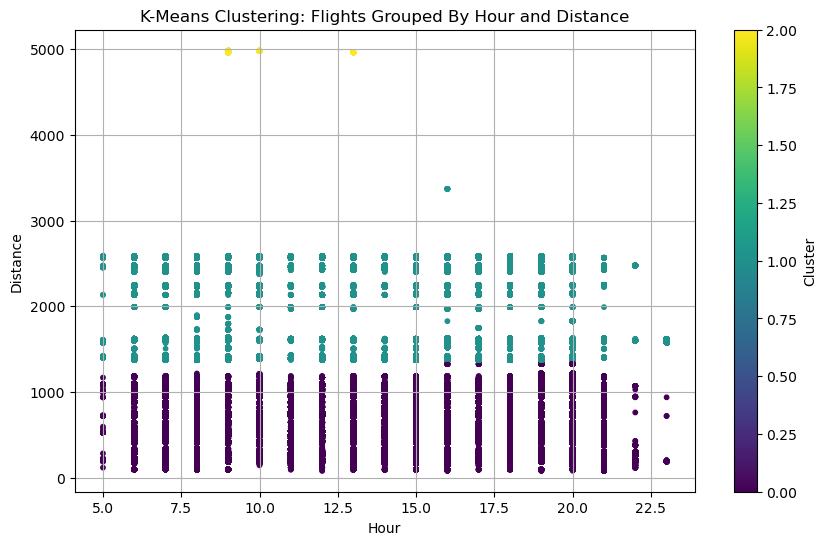

In [86]:
#visualizing this clustering

import matplotlib.pyplot as plt

#compute results for visualization
clustered_df = df2[['hour','distance','cluster']].compute()

plt.figure(figsize=(10,6))
scatter = plt.scatter(clustered_df['hour'], clustered_df['distance'], c=clustered_df['cluster'], cmap='viridis', s=10)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Hour')
plt.ylabel('Distance')
plt.title('K-Means Clustering: Flights Grouped By Hour and Distance')
plt.grid(True)
plt.show()

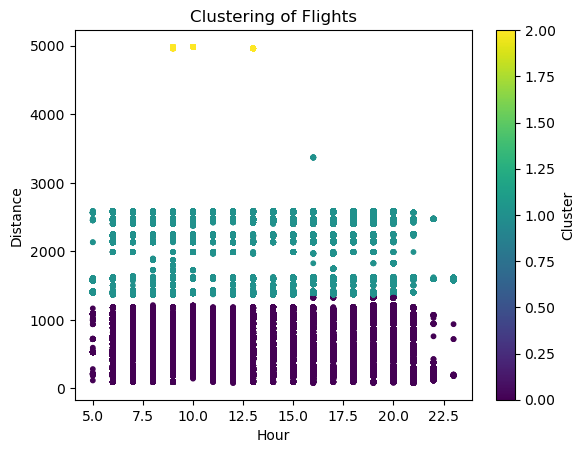

In [89]:
#without grid
import matplotlib.pyplot as plt

clusters_df = df2[['hour','distance', 'cluster']].compute()

plt.scatter(clusters_df['hour'], clusters_df['distance'], c=clusters_df['cluster'], cmap='viridis', s=10)
plt.xlabel('Hour')
plt.ylabel('Distance')
plt.title('Clustering of Flights')
plt.colorbar(label='Cluster')
plt.show()

In [119]:
df1 =df

In [120]:
df1.compute()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0.0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,...,1545.0,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00,United Air Lines Inc.
1,1.0,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,...,1714.0,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00,United Air Lines Inc.
2,2.0,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,...,1141.0,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00,American Airlines Inc.
3,3.0,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,...,725.0,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00,JetBlue Airways
4,4.0,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,...,461.0,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,336765.0,2013.0,9.0,30.0,2240.0,2245.0,-5.0,2334.0,2351.0,-17.0,...,1816.0,N354JB,JFK,SYR,41.0,209.0,22.0,45.0,2013-09-30 22:00:00,JetBlue Airways
336766,336766.0,2013.0,9.0,30.0,2240.0,2250.0,-10.0,2347.0,7.0,-20.0,...,2002.0,N281JB,JFK,BUF,52.0,301.0,22.0,50.0,2013-09-30 22:00:00,JetBlue Airways
336767,336767.0,2013.0,9.0,30.0,2241.0,2246.0,-5.0,2345.0,1.0,-16.0,...,486.0,N346JB,JFK,ROC,47.0,264.0,22.0,46.0,2013-09-30 22:00:00,JetBlue Airways
336768,336768.0,2013.0,9.0,30.0,2307.0,2255.0,12.0,2359.0,2358.0,1.0,...,718.0,N565JB,JFK,BOS,33.0,187.0,22.0,55.0,2013-09-30 22:00:00,JetBlue Airways


In [121]:
# Select the relevant features
selected_columns = ['distance', 'dep_delay', 'arr_delay', 'hour', 'minute']
target_column = 'air_time'

# Drop rows with missing values
df1 = df1[selected_columns + [target_column]].dropna()

In [122]:
from dask_ml.preprocessing import StandardScaler

# Convert to Dask arrays
X = df1[selected_columns].to_dask_array(lengths=True)
y = df1[target_column].to_dask_array(lengths=True)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [123]:
from dask_ml.datasets import make_regression

# Create synthetic data
X, y = make_regression(n_samples=10000, n_features=len(selected_columns), chunks=1000)


In [124]:
from dask_ml.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()

In [125]:
model.fit(X, y)

LinearRegression()

In [126]:
predictions = model.predict(X)

In [127]:
from sklearn.metrics import mean_squared_error

# Compute and print the Mean Squared Error
mse = mean_squared_error(y.compute(), predictions.compute())
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.000474008963139706
